# Backpropagation

Backpropagation es un método que implementa eficientemente la regla de la cadena de Leibniz (1673) con el objetivo de calcular el gradiente de una función de pérdida con respecto a los pesos de la red para cada una de las parejas $x_i$, $y_i$ del conjunto de datos. El algoritmo de backpropagation calcula el gradiente una capa a la vez y comienza desde la última hacia atrás eliminando cálculos redundantes de términos intermedios en la regla de la cadena [1].

## Derivación del algoritmo [2]

El objetivo es calcular el gradiente de la función de error con respecto a los persos, es decir: $\frac{\partial E}{\partial w_i}$ para todo $i$.

Considerese la siguiente red neuronal multicapa. Nos concentraremos en una neurona $z_j$ ubicada en una capa interna $N$ de la red.

**Nota:** En esta explicación, el índice $i$ se usa para la capa $N-1$, el $j$, para la capa $N$ y el $k$ para la capa $N+1$.
**Nota:** En esta explicación, no se hace distinción entre los sesgos y los pesos. Los cálculos aplican de igual manera para los sesgos, con la diferencia de que cuando tengan que multiplicarse por un peso, se multiplican por 1.

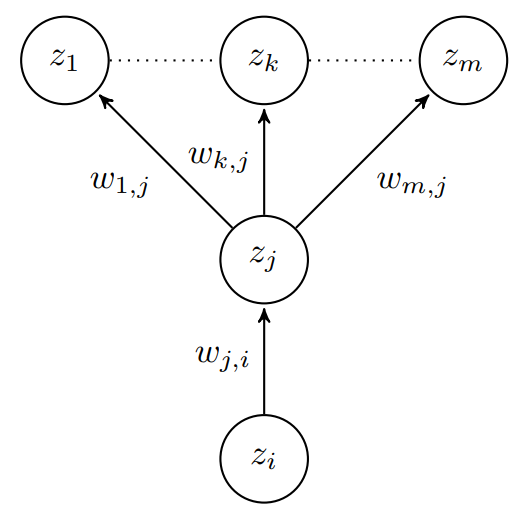

Para la cual:

$a_j = \sum_{i} w_{ji} z_i$ \
$z_j = h(a_j)$ \

La estrategia es expresar el gradiente en términos de dos cantidades fáciles de calcular. Por la regla de la cadena se tiene que:

$\frac{\partial E}{\partial w_{ji}}=\frac{\partial E}{\partial a_j}\frac{\partial a_j}{\partial w_{ji}}$

El primer término se llama $\delta_j$:

$\delta_j=\frac{\partial E}{\partial a_j}$

Y el segundo término es la derivada de una función lineal cuya constante es $z_i$, por tanto:

$\frac{\partial a_j}{\partial w_{ji}}=\frac{\partial \sum_{i} w_{ji} z_i}{\partial w_{ji}}=z_i$

Este $z_i$ es el resultado de la activación de la neurona: $h(a_i)=z_i$

Entonces el gradiente puede expresarse como el producto de estas dos cantidades, así:

$\frac{\partial E}{\partial w_{ji}}=\delta_j z_i$

El valor de $z_i$ es calculado cuando se propagan hacia adelante las entradas $x_1, x_2, ..., x_n$ por la red. Propagar hacia adelante es calcular las activaciones de las neuronas en cada capa.

El valor de $\delta_j$ se calcula cuando se hace la propagación hacia atrás (backpropagation). Para determinar el cálculo que se debe hacer, se recordará la definición de la regla de la cadena generalizada.

Dada una función $y=f(u_1, ..., u_m)$ con $u_l=g(x_1, ..., x_n)$, la derivada $\frac{\partial y}{\partial x_i}$ se calcula así:

$\frac{\partial y}{\partial x_i}=\sum_{l=1}^m \frac{\partial y}{\partial u_l}\frac{\partial u_l}{\partial x_i}$

La función de error $E$ se calcula con el valor de la salida $y$ en la última capa. Esta salida $y$ se calcula tras hacer la propagación hacia adelante, que consistió en calcular todos los $a$ y todas las activaciones $z$. Por tanto, se puede decir que la función de error $E$ es una función de los valores de $a$. Digamos que nuestra neurona $z_j$ está en la capa $N$. Ahora, como $E$ es función de los valores de $a$ de cada una de las capas, podemos escribir a $E$ así:

$E=f(a_1, ..., a_k, ..., a_m)$

Donde $a_1, ..., a_k, ..., a_m$ son los valores de $a$ de las neuronas de la capa $N+1$.

Ahora, aplicando la regla de la cadena generalizada tendremos:

$\delta_j=\frac{\partial E}{\partial a_j}=\sum_{k=1}^m \frac{\partial E}{\partial a_k}\frac{\partial a_k}{\partial a_j}=\sum_{k=1}^m \delta_k\frac{\partial a_k}{\partial a_j}$

Nótese que se escribe $\frac{\partial a_k}{\partial a_j}$ por que tras la propagación hacia adelante, se puede decir que los $a$ de la capa $N+1$ son funciones del $a_j$ de la capa $N$.

Esto también significa que se puede ver a los $a$ de la capa $N+1$ como funciones de las activaciones de la capa $N$ anterior. Por tanto, usando nuevamente la regla de la cadena, es posible reescribir $\frac{\partial a_k}{\partial a_j}$ como: $\frac{\partial a_k}{\partial z_j}\frac{\partial z_j}{\partial a_j}$.

Y además, recordando que $z_j=h(a_j)$, entonces:

$\frac{\partial z_j}{\partial a_j}=h'(a_j)$

Y para $\frac{\partial a_k}{\partial z_j}$, aplicando el mismo razonamiento utilizado para deducir $z_i$, se tiene que:

$\frac{\partial a_k}{\partial z_j}=\frac{\partial \sum_{j} w_{kj} z_j}{\partial w_{kj}}=w_{kj}$

Entonces, la expresión para $\delta_j$ puede reescribirse así:

$\delta_j=h'(a_j)\sum_{k=1}^m \delta_k w_{kj}$

Esta es la expresión usada en la propagación hacia atrás. Se calcula cada $\delta$ en función de los pesos y los $\delta$ de la capa subsiguiente.

De esta manera, la propagación hacia adelante está dada por expresiones de la forma:

$z_j = h(\sum_{i} w_{ji} z_i)$

Y la propagación hacia atrás, por expresiones de la forma:

$\delta_j=h'(a_j)\sum_{k} \delta_k w_{kj}$

Obtenidos los valores $\delta$ y $z$, correspondientes, se computa el gradiente multiplicando estos valores así:

$\frac{\partial E}{\partial w_{ji}}=\delta_j z_i$

El algoritmo de backpropagation puede incluirse en una función de aprendizaje (entrenamiento) como se muestra en el siguiente pseudocódigo en la línea 6:

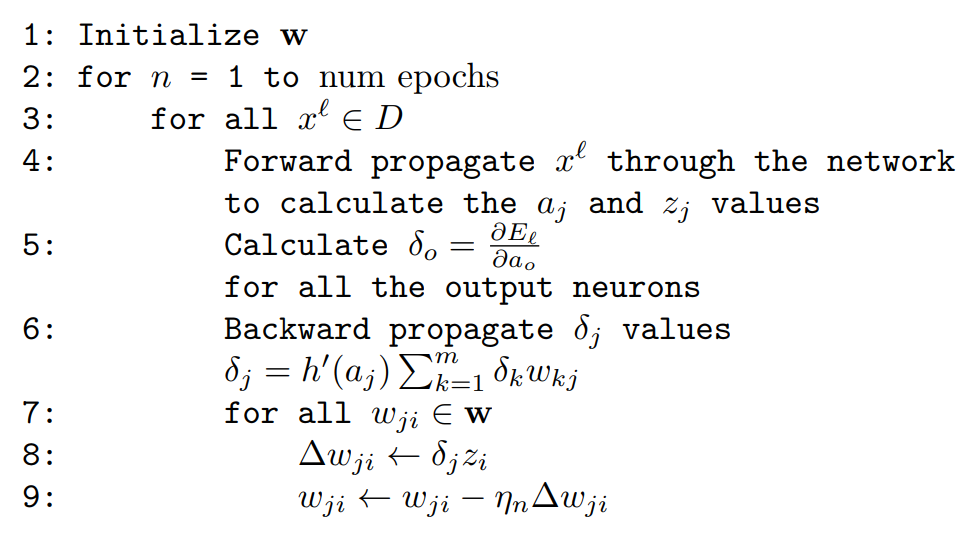


## Implementación

Se hizo una implementación del algoritmo de backpropagation incluyendo una función de aprendizaje (entrenamiento) basada en el gradiente descendente.

La red neuronal para la cual se escribió este programa es la siguiente:

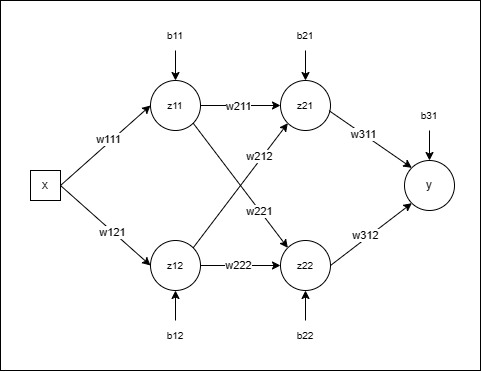

El objetivo es predecir la esperanza de vida $y$ de una población a partir del año de nacimiento $x$.

Las transformaciones que hace la red neuronal son de la siguiente forma:

$\mathbb{R}\rightarrow\mathbb{R}^2\rightarrow\mathbb{R}^2\rightarrow\mathbb{R}$


In [13]:
import numpy as np

### Creación y normalización del conjunto de datos

In [14]:
# Create an array of years from 1900 to 2023
years = np.arange(1900, 2024)

# Generate dummy life expectancy values with added noise
base_life_expectancy = 58 + 0.2 * (years - 1900)
noise = np.random.normal(0, 2, len(years))
life_expectancy = base_life_expectancy + noise

# Create a dummy dataset with two columns: "year" and "life_expectancy"
data = np.column_stack((years, life_expectancy))

print('Dataset:')
print(data[:15])

X = data[:, 0]
Y = data[:, 1]

# Define a normalization function
def normalize(X):
    min_val = np.min(X)
    max_val = np.max(X)
    normalized_X = (X - min_val) / (max_val - min_val)
    return normalized_X

X = normalize(X)
Y = normalize(Y)

print('Normalized Data:')
print('X:', X[:10])
print('Y:', Y[:10])

Dataset:
[[1900.           57.23189129]
 [1901.           60.46753888]
 [1902.           56.20021747]
 [1903.           58.25514358]
 [1904.           57.04428316]
 [1905.           59.08442749]
 [1906.           60.36563043]
 [1907.           57.19876165]
 [1908.           61.88944742]
 [1909.           61.60318144]
 [1910.           61.00498868]
 [1911.           62.0017119 ]
 [1912.           59.03254428]
 [1913.           60.35421955]
 [1914.           58.92846113]]
Normalized Data:
X: [0.         0.00813008 0.01626016 0.02439024 0.03252033 0.04065041
 0.04878049 0.05691057 0.06504065 0.07317073]
Y: [0.0371989  0.15386614 0.         0.07409415 0.03043434 0.10399551
 0.15019164 0.03600435 0.20513568 0.19481383]


### Inicialización de los pesos

In [15]:
# this is only to show the position of the weights in the array based on the layer
w = np.array([0, 0, 0, 0,       # layer 1
              0, 0, 0, 0, 0, 0, # layer 2
              0, 0, 0])         # layer 3 (out)

np.random.seed(1) # seed that allows convergence for the gradient descent
w = np.random.randn(13)
print('Initial Weights:')
print('w:', w)

Initial Weights:
w: [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172 ]


### Función de propagación hacia adelante

In [16]:
# activation function of the output layer
def identity(x):
    return x

# activation function of hidden layers
def relu(x):
    return max(0, x)

# not used
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

# forward propagation function
def forward_propagation(w, x):
    # weights naming convention: w{layer}{target-neuron}{origin-neuron}
    w111, w121, b11, b12 = w[0:4]
    w211, w212, w221, w222, b21, b22 = w[4:10]
    w311, w312, b31 = w[10:13]

    # layer 1
    s11 = (x * w111) + b11
    z11 = relu(s11)

    s12 = (x * w121) + b12
    z12 = relu(s12)

    # layer 2
    s21 = np.dot([z11, z12], [w211, w212]) + b21
    z21 = relu(s21)

    s22 = np.dot([z11, z12], [w221, w222]) + b22
    z22 = relu(s22)

    # layer 3 (out)
    s31 = np.dot([z21, z22], [w311, w312]) + b31
    z31 = relu(s31)

    y = identity(z31)
    # we return sum values and activations because they are needed
    # in the backpropagation step
    return y, [s11, s12, s21, s22, s31], [z11, z12, z21, z22, z31]

### Función de pérdida

In [17]:
def loss(y_real, y_pred):
    return (1/2) * (y_real - y_pred) ** 2.

### Implementación de la propagación hacia atrás

In [18]:
def relu_deriv(x):
    return 1 if x > 0 else 0

def identity_deriv(x):
    return 1

# not used
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def loss_deriv(s_out, y_real):
    return (identity(s_out) - y_real) * identity_deriv(s_out)

def backpropagation(w, x, y_real, sums, activations):
    # weights naming convention: weights naming convention: w{layer}{target-neuron}{origin-neuron}
    w111, w121, b11, b12 = w[0:4]
    w211, w212, w221, w222, b21, b22 = w[4:10]
    w311, w312, b31 = w[10:13]

    s11, s12, s21, s22, s31 = sums
    z11, z12, z21, z22, z31 = activations

    # layer 3 (out)
    # the first delta is calculated with the derivative of the loss function
    delta_out = loss_deriv(s31, y_real)

    # layer 2
    delta_21 = relu_deriv(s21) * (delta_out * w311 + b21)
    delta_22 = relu_deriv(s22) * (delta_out * w311 + b22)
    # the delta for the biases is 1
    # we can think of it in matricial notation like: [dout, 1] . [w311, b21]

    # layer 1
    delta_11 = relu_deriv(s11) * (np.dot([delta_21, delta_22], [w211, w221]) + b11)
    delta_12 = relu_deriv(s12) * (np.dot([delta_21, delta_22], [w212, w222]) + b12)

    # gradients calculation: delta x activation
    # note that the activations in the first layer are the inputs
    # and the activations for the biases are 1
    grad_w111 = delta_11 * x
    grad_w121 = delta_12 * x
    grad_b11 = delta_11 * 1
    grad_b12 = delta_12 * 1

    grad_w211 = delta_21 * z11
    grad_w212 = delta_21 * z12
    grad_w221 = delta_22 * z11
    grad_w222 = delta_22 * z12
    grad_b21 = delta_21 * 1
    grad_b22 = delta_22 * 1

    grad_w311 = delta_out * z21
    grad_w312 = delta_out * z22
    grad_b31 = delta_out * 1

    gradients = [grad_w111, grad_w121, grad_b11, grad_b12,
                 grad_w211, grad_w212, grad_w221, grad_w222, grad_b21, grad_b22,
                 grad_w311, grad_w312, grad_b31]

    return gradients

### Actualización de pesos con el gradiente descendente y aprendizaje

In [19]:
def update_weights(w, x, gradients):
    # weights naming convention:
    # w{layer}{target-neuron}{origin}
    w111, w121, b11, b12 = w[0:4]
    w211, w212, w221, w222, b21, b22 = w[4:10]
    w311, w312, b31 = w[10:13]

    grad_w111, grad_w121, grad_b11, grad_b12 = gradients[0:4]
    grad_w211, grad_w212, grad_w221, grad_w222, grad_b21, grad_b22 = gradients[4:10]
    grad_w311, grad_w312, grad_b31 = gradients[10:13]

    # gradient_descent
    eta = 0.01

    w111 = w111 - eta * grad_w111
    w121 = w121 - eta * grad_w121
    b11 = b11 - eta * grad_b11
    b12 = b12 - eta * grad_b12

    w211 = w211 - eta * grad_w211
    w212 = w212 - eta * grad_w212
    w221 = w221 - eta * grad_w221
    w222 = w222 - eta * grad_w222
    b21 = b21 - eta * grad_b21
    b22 = b22 - eta * grad_b22

    w311 = w311 - eta * grad_w311
    w312 = w312 - eta * grad_w312
    b31 = b31 - eta * grad_b31

    w = [w111, w121, b11, b12,
         w211, w212, w221, w222, b21, b22,
         w311, w312, b31]

    return w

def learning(w, X, Y):
    epochs = 1000
    for n in range(epochs):
        for x, y_real in zip(X, Y):
            y_pred, sums, activations = forward_propagation(w, x)
            gradients = backpropagation(w, x, y_real, sums, activations)
            w = update_weights(w, x, gradients)
    return w

w = learning(w, X, Y)
print('Calibrated Weights:')
print('W_new:', np.array(w))

Calibrated Weights:
W_new: [ 3.97263831e+00 -6.11756414e-01  3.90123319e-04 -1.07296862e+00
  1.30938781e+00 -2.30153870e+00  2.85037485e+00 -7.61206901e-01
  3.42897641e-04  3.42897641e-04  1.96723722e+00 -8.26386263e-01
  6.92264920e-02]


### Gráfica de la curva aprendida de acuerdo a los pesos encontrados

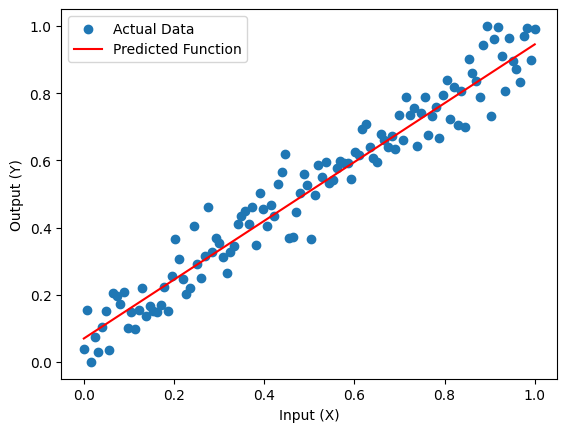

In [20]:
# Make predictions for each input value in the range
x_range = np.linspace(min(X), max(X), 100)
y_pred_range = []
for x in x_range:
    y_pred, _, _ = forward_propagation(w, x)
    y_pred_range.append(y_pred)

# Plot the resulting function
import matplotlib.pyplot as plt

plt.scatter(X, Y, label='Actual Data')
plt.plot(x_range, y_pred_range, label='Predicted Function', color='red')
plt.xlabel('Input (X)')
plt.ylabel('Output (Y)')
plt.legend()
plt.show()

## Referencias

[1] . https://en.wikipedia.org/wiki/Backpropagation \
[2] . https://fagonzalezo.github.io/ml-2018-1/backpropagation.pdf